# Learning Objectives
 + Simple and Multiple Linear Regression.
 + Model Evaluation using Visualization.
 + Polynomial Regression and Pipelines.
 + R-squared and MSE for In-Sample Evaluation.
 + Prediction and Decision making.


## Question:
 + how to determine a fair value for a used car?

## Model
+ A model can be thought of as a mathematical equation used to predict a value given one or more other values.
+ Relating one or more independent variables to dependent variables.
+ Usually the more relavant data we have the more accurate our model is. 
   + for example: 
      + we have two almost identical cars. Pink cars sell for significantly less. If we miss color of the cars to prdict the price the prediction will be false.

# Simple Linear Regression
+ The predictor (independent) variable -> x
+ The Target (dependent) variable -> y
$$Y=b_0+b_1x$$
  + $b_0$: the intercept
  + $b_1$: the slope
![](https://editor.analyticsvidhya.com/uploads/375512.jpg)

# Fitting a simple Linear Model Estimator.
+ X: predictor variable
+ Y: Target variable


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/home/jrana/home/myCoolDataScienceLearning/datasets/auto.csv")

In [3]:


headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]



In [4]:
df.columns=headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [5]:
lm = LinearRegression()

## we define the predictor variable and target variable

In [13]:
X=df[['highway-mpg']].replace('?','23').astype('float')
Y=df["price"].replace('?',23).astype('float')
X.dtypes,Y.dtypes

(highway-mpg    float64
 dtype: object,
 dtype('float64'))

## then use <code>lm.fit()</code> to fit the model in order to find $b_0$ and $b_1$

In [14]:
lm.fit(X,Y)

LinearRegression()

## now we can obtain a prediction

In [15]:
Yhat=lm.predict(X)

In [17]:
b_0=lm.intercept_
b_1=lm.coef_
b_0,b_1

(37799.95748208101, array([-807.70452865]))

## now we can say
$$Price=b_0+b_1\cdot highway-mpg$$

# Multiple Linear Regression
+ One continuous target (Y) variable.
+ Two or more predictor (X) variables.
$$ Y=b_0+b_1\cdot x_1 + b_2 \cdot x_2 + b_3 \cdot x_3+b_4 \cdot x_4 $$
    + $b_0$: intercept $(X=0)$
    + $b_1$: coff or parameter of $x_1$

In [ ]:
X=df['A','B']
Y=df['C']
lm.fit(X,Y)
lm.predict(['A','B'])

# Model Evaluation using Visualization

## Regression plot
it gives us a good estimate of:
+ The Relationship between two variables
+ The strength of the correlation.
+ The direction of the relationship(positive or negative)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
df['highway-mpg']=df['highway-mpg'].replace('?',23).astype('float')
df['price']=df['price'].replace('?',23).astype('float')

(0.0, 48172.091523090836)

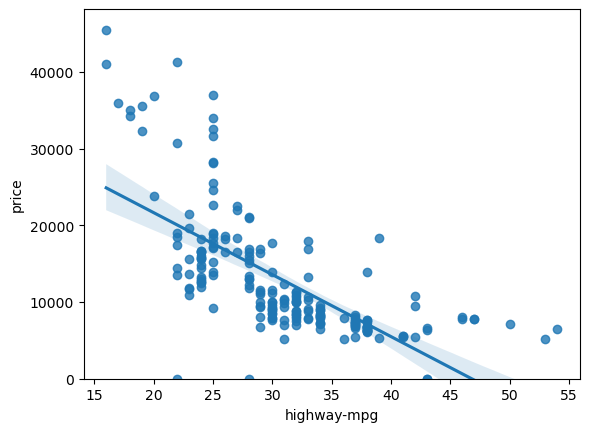

In [21]:
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

## Residual Plot
 + the residual plot represents the error between the actual values.
 + Examine the actual values and predicted valeus.
 + we expect to see the result to have zero mean
 + if distributed evenly around the x axis with similar variance and there is no cuvature it suggests that a linear plot is appropriate.
 

/home/jrana/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

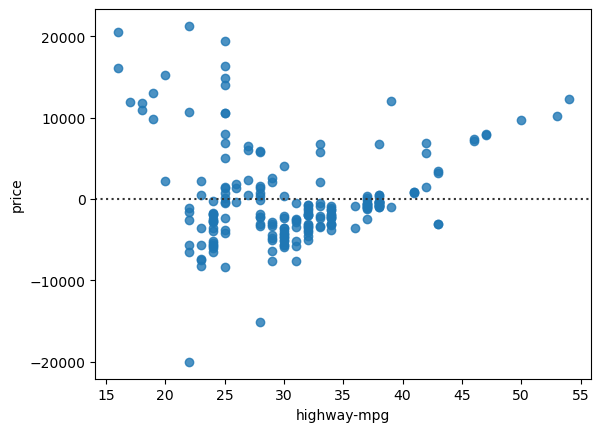

In [22]:
sns.residplot(df['highway-mpg'],df['price'])

there is a curvature.

## Distribution plot
+ it counts the predicted value versus the actual value
+ this plot is extremly useful for visualizing models with more than one independent variable or feature.

/home/jrana/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jrana/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

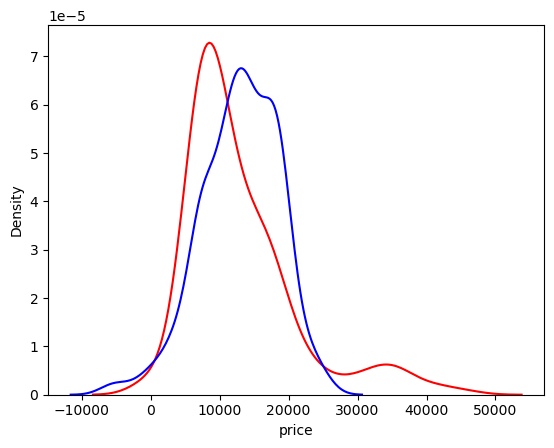

In [24]:
axl = sns.distplot(df['price'],hist=False,color='r',label='actual-value')
sns.distplot(Yhat,hist=False,color='b',label='fitted-value',ax=axl)

# Polynomial Regression and Pipelines
if linear model is not a best fit for our data?
+ go for polynomial regression
+ transform data into a polynomial 
+ then use linear regression to fit the parameters

## Polynomial Regression
 + this method is beneficial for describing curvilinear relationships.
 + curvilinear relationships can be obtained by squaring or setting higher-order terms of the predictor variables.
 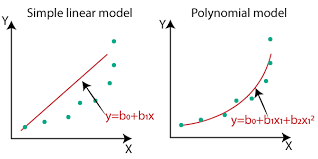

## Calculate plynomial of $3^{rd}$ order

In [25]:
import numpy as np

In [27]:
f=np.polyfit(df['highway-mpg'],df['price'],3)
p=np.poly1d(f)
print(p)

        3         2
-1.495 x + 196.5 x - 8627 x + 1.334e+05


## we may have multi-dimensional polynomial linear regression and polynomial can get complicated. in this case <code>np.polyfit()</code>  does not work. As a result we can use Preprossing library from sci-kit-learn.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_transform(x[['horsepower','curb-weight']])

## for example we can normalize each feature simultaneously

In [ ]:
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(x_data[['hoursepower','highway-mpg']])
x_scale=SCALE.transform(x_data[['hoursepower','highway-mpg']])

# Pipeline
we can simplify the whole process using Pipeline

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression()) ]
pipe=Pipeline(input)
pipe.train(X['A','B'],y)
pipe.predict()

## work flow
x -> Normalization -> Polynomial transform -> Linear Regression

# Measures for In-Sample Evaluation
A way to numerically determine how good the model fits on dataset. Two important measures to determine the fit of a model.
+ Mean Squared Error(MSE)
+ R-Squared($R^2$)

## MSE
![](https://www.researchgate.net/publication/221515860/figure/fig1/AS:339586132791298@1457975051470/Mean-Squared-Error-formula-used-to-evaluate-the-user-model.png)<br/>
In python we can measure the **MSE** as follows

In [ ]:
from sklearn.matrics import mean_squared_error
mean_squared_error(df['price'],predicted_price)

## R-Squared
+ this is coefficient of Determination 
+ is a measure to determine how close the data is to the fitted regression line.
+ it is the percentage of variation of the target variable(Y) that is explained by the linear model
$$R^2=\left(1-\frac{\text{MSE of regression line}}{\text{MSE of the avg of the data}}\right)$$
+ generally the values of **MSE** are between 0 and 1.
+ we can calculate the $R^2$ in python

In [ ]:
X=df['A']
Y=df['B']
lm=fit(X,Y)
lm.score(X,Y) # will give R**2 value. if R**2 is negative then overfitting